In [2]:
import sys

path_src = '../src'
sys.path.append(path_src)
import importlib
import SpatialAnalysis as SpAn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Script loaded!


Script loaded!


<Axes: xlabel='0', ylabel='1'>

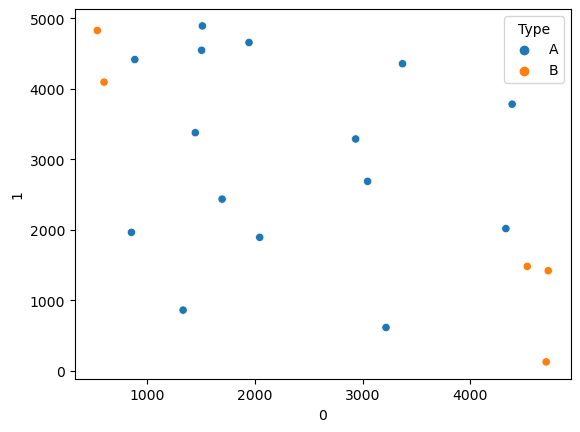

In [11]:
importlib.reload(SpAn)
# Example usage
min_x, max_x = 0, 5000
min_y, max_y = 0, 5000
num_points = 20
min_distance = 100
annotations = {'A':.8,'B':.2}

points, annotation_list = SpAn.generate_points(max_x, max_y, num_points, min_distance = min_distance, equidistant=False, annotation = annotations )
coordiantes = pd.DataFrame(points)
coordiantes['Type'] = annotation_list
sns.scatterplot(x = coordiantes.iloc[:,0], y = coordiantes.iloc[:,1], hue = coordiantes.Type)

In [21]:
importlib.reload(SpAn)

additional_coords, additional_types = SpAn.neighboring_points(points, annotation_list, ['A'], ['C','D'] , [100,100] , 2)

Script loaded!


<Axes: xlabel='0', ylabel='1'>

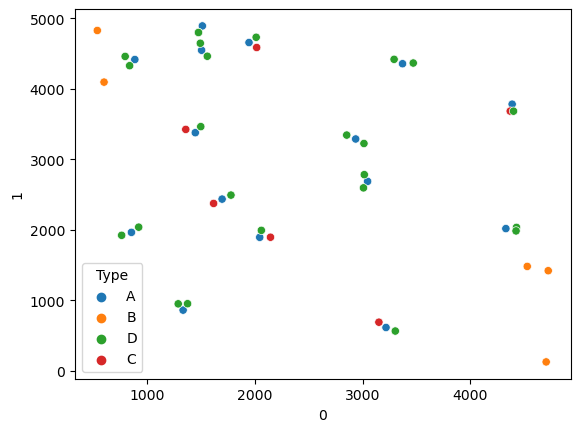

In [22]:
additional_coords = pd.DataFrame(additional_coords)
additional_coords['Type'] = additional_types
coordiantes2 = pd.concat([coordiantes, additional_coords])
sns.scatterplot(x = coordiantes2.iloc[:,0], y = coordiantes2.iloc[:,1], hue = coordiantes2.Type)


In [23]:
importlib.reload(SpAn)

# Export the DataFrame to the specified file path
file_path = '../data/simulation_coordiantes/example_01.csv'
SpAn.export_df_to_csv(coordiantes2, file_path)

Script loaded!


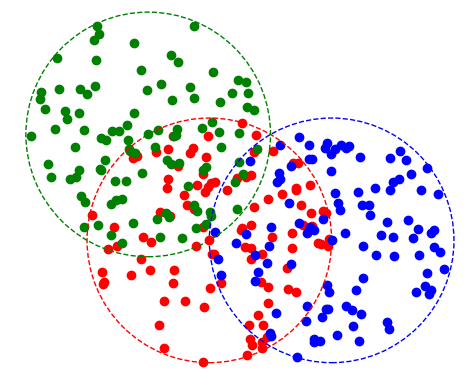

,x,y,niche,cell_type
138,4.946124,-7.578171,B,X


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def generate_random_points_with_centers(radius, center_distance, num_points_per_center):
    # Function to generate three equidistant points
    def generate_equidistant_centers(radius, center_distance):
        angle = 2 * np.pi / 3
        center_a = (0, 0)
        center_b = (center_distance, 0)
        center_c = (center_distance * np.cos(angle), center_distance * np.sin(angle))
        return np.array([center_a, center_b, center_c])

    # Function to generate random points within a radius
    def generate_random_points(center, radius, num_points):
        points = []
        for _ in range(num_points):
            r = radius * np.sqrt(random.random())
            theta = random.random() * 2 * np.pi
            x = center[0] + r * np.cos(theta)
            y = center[1] + r * np.sin(theta)
            points.append((x, y))
        return points

    # Generate centers
    centers = generate_equidistant_centers(radius, center_distance)
    center_labels = ['A', 'B', 'C']

    # Generate points for each center
    all_points = []
    for center, label in zip(centers, center_labels):
        points = generate_random_points(center, radius, num_points_per_center)
        for point in points:
            all_points.append((point[0], point[1], label))

    # Create DataFrame
    df = pd.DataFrame(all_points, columns=['x', 'y', 'niche'])

    return df, centers

def add_random_cell_type(df, value_prob_dict):
    values = list(value_prob_dict.keys())
    probabilities = list(value_prob_dict.values())
    df['cell_type'] = np.random.choice(values, size=len(df), p=probabilities)
    return df

types_dict = {'X': 0.5, 'Y': 0.3, 'Z': 0.2}

# Parameters
radius = 10
center_distance = 10
num_points_per_center = 100

# Generate the DataFrame and centers
df, centers = generate_random_points_with_centers(radius, center_distance, num_points_per_center)
df = add_random_cell_type(df, types_dict)

# Plotting the points and circles
fig, ax = plt.subplots()
colors = {'A': 'red', 'B': 'blue', 'C': 'green'}

# Plot the random points
for label, group in df.groupby('niche'):
    ax.scatter(group['x'], group['y'], label=f'Center {label}', color=colors[label])

# Plot the centers and circles
for center, label in zip(centers, colors.keys()):
    circle = plt.Circle(center, radius, color=colors[label], fill=False, linestyle='--')
    ax.add_artist(circle)
    ax.plot(center[0], center[1], 'o', color=colors[label])

ax.set_aspect('equal', 'box')
plt.xlabel('')
plt.ylabel('')
plt.title('')
# plt.legend()
plt.grid(False)
plt.axis('off')

plt.show()
df.sample()


In [38]:
df.to_csv('../data/simulation_coordiantes/example_3_niches.csv')